# Comparing different hierarchical linkage methods on toy datasets
[https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#:~:text=The%20main%20observations%20to%20make,effective%20method%20for%20noisy%20data.]

### Main Observations:
- single linkage is fast, and can perform well on non-globular data, but it performs poorly in the presence of noise.

- average and complete linkage perform well on cleanly separated globular clusters, but have mixed results otherwise.

- Ward is the most effective method for noisy data.

(A globular cluster is a spheroidal conglomeration of stars that is bound together by gravity, with a higher concentration of stars towards their centers.) - wikipedia

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# from sklearn import cluster, datasets
from sklearn import datasets

import pandas as pd
# import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering as ag_cluster

In [2]:
n_samples=1500  # no of samples

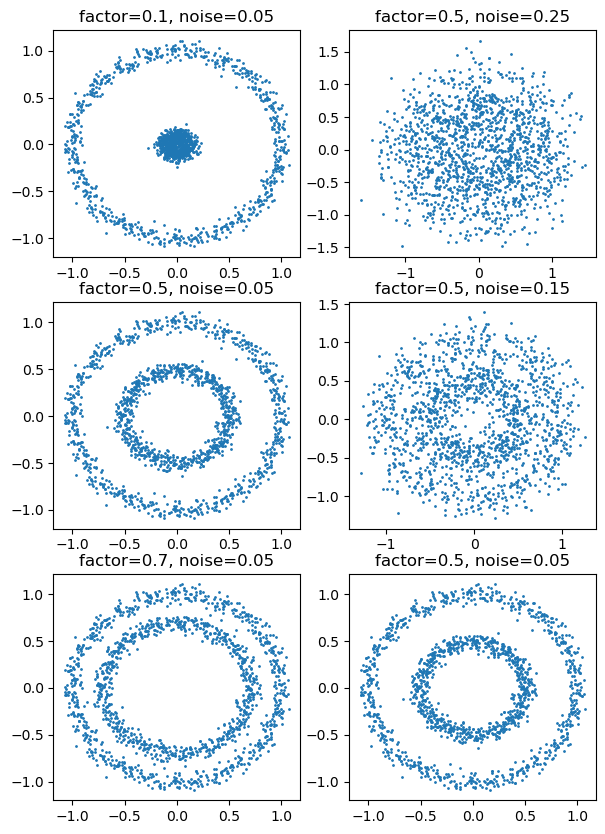

In [3]:
factor_values=[0.1,0.5,0.7]
noise_values=[0.25,0.15,0.05]
fig,axs=plt.subplots(3,2,figsize=[7,10])
for i in range(3):
    noisy_circles_fac=datasets.make_circles(n_samples=n_samples,factor=factor_values[i],noise=0.05,random_state=170)
    x1=[i[0] for i in noisy_circles_fac[0]]
    y1=[i[1] for i in noisy_circles_fac[0]]
    
    noisy_circles_noise=datasets.make_circles(n_samples=n_samples,factor=0.5,noise=noise_values[i],random_state=170)
    x2=[i[0] for i in noisy_circles_noise[0]]
    y2=[i[1] for i in noisy_circles_noise[0]]
    
    axs[i][0].scatter(x1,y1,s=1)
    axs[i][0].set_title(f'factor={factor_values[i]}, noise=0.05')
    
    axs[i][1].scatter(x2,y2,s=1)
    axs[i][1].set_title(f'factor=0.5, noise={noise_values[i]}')
    

plt.show()

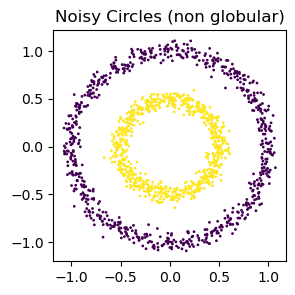

In [28]:
# Make a large circle containing a smaller circle in 2d
noisy_circles=datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=170)
x=[i[0] for i in noisy_circles[0]]
y=[i[1] for i in noisy_circles[0]]

# creating dataframe
tempdict={'x':x,'y':y,'category':noisy_circles[1]}
noisy_circles_df=pd.DataFrame(tempdict)

plt.figure(figsize=(3,3))
plt.scatter(noisy_circles_df['x'],noisy_circles_df['y'],c=noisy_circles_df['category'],s=1)
plt.title('Noisy Circles (non globular)')
plt.show()

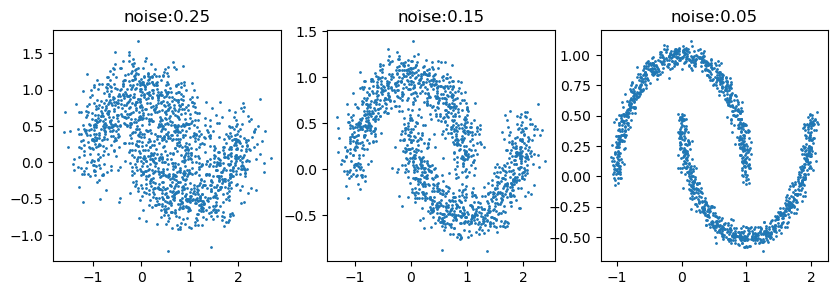

In [5]:
fig,axs=plt.subplots(1,3,figsize=[10,3])
noise_values=[0.25,0.15,0.05]
for i in range (3):
    noise_value=noise_values[i]
    test_noisy_moons=datasets.make_moons(n_samples=n_samples,noise=noise_value,random_state=170)
    x=[i[0] for i in test_noisy_moons[0]]
    y=[i[1] for i in test_noisy_moons[0]]
    axs[i].scatter(x,y,s=1)
    axs[i].set_title(f'noise:{noise_value}')

plt.show()

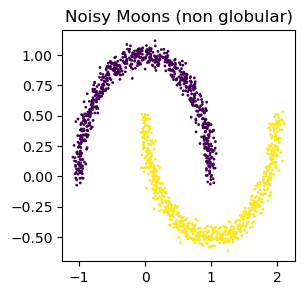

In [29]:
# Make a large circle containing a smaller circle in 2d.
noisy_moons=datasets.make_moons(n_samples=n_samples, noise=0.05,random_state=170)

x=[i[0] for i in noisy_moons[0]]
y=[i[1] for i in noisy_moons[0]]

tempdict={'x':x,'y':y,'category':noisy_moons[1]}
noisy_moons_df=pd.DataFrame(tempdict)

plt.figure(figsize=(3,3))
plt.scatter(noisy_moons_df['x'],noisy_moons_df['y'],c=noisy_moons_df['category'],s=1)
plt.title('Noisy Moons (non globular)')
plt.show()

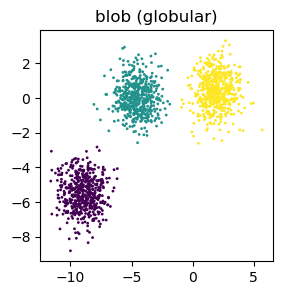

In [30]:
# blob data 
blob=datasets.make_blobs(n_samples=n_samples, random_state=170)

tempdict={'x':[i[0] for i in blob[0]],'y':[i[1] for i in blob[0]],'category':blob[1]}
blob_df=pd.DataFrame(tempdict)

plt.figure(figsize=(3,3))
plt.title('blob (globular)')
plt.scatter(blob_df['x'],blob_df['y'],c=blob_df['category'],s=1)

In [8]:
rng=np.random.RandomState(170)

In [9]:
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)
g=[i[0] for i in varied[0]]

# print(g)
tempdict={'x':[i[0] for i in varied[0]],'y':[i[1] for i in varied[0]],'category':varied[1]}
varied_df=pd.DataFrame(tempdict)

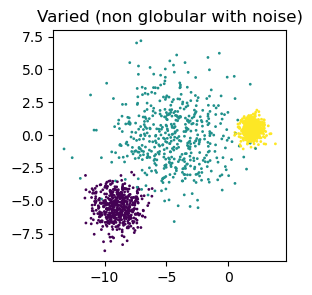

In [31]:
plt.figure(figsize=(3,3))
plt.scatter(varied_df['x'],varied_df['y'],s=1,c=varied_df['category'])
plt.title('Varied (non globular with noise)')
plt.show()

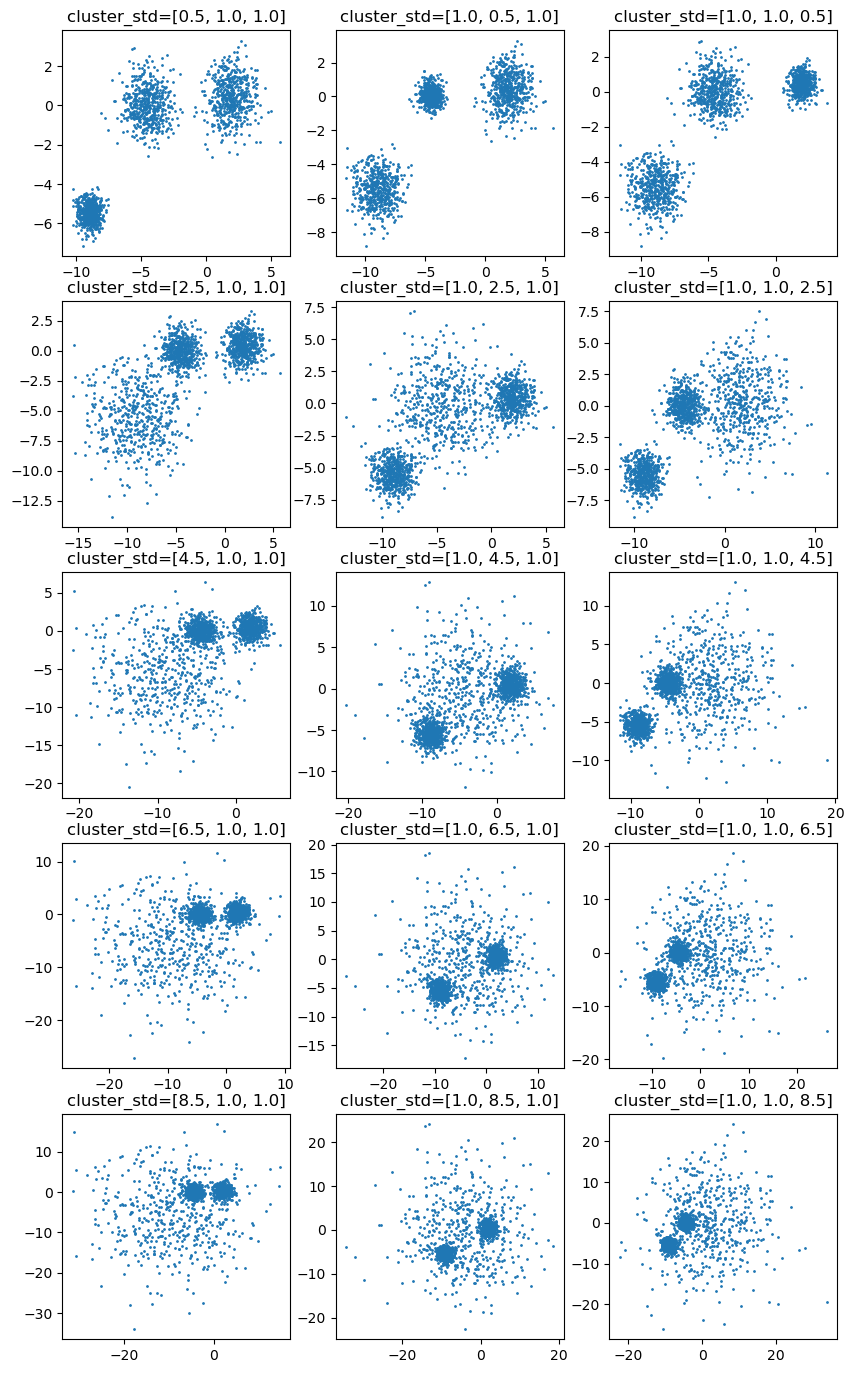

In [37]:
fig,axs=plt.subplots(5,3,figsize=(10,17))
flat_graph=axs.flat

defaut_value=[1.,1.,1.]
change_list=[0.5,2.5,4.5,6.5,8.5]

graph_title=['changing std of\nfirst blob','changing std of\nsecond blob','changing std of\nthird blob']
for i in range(3):
    for j in range(5):
        std_values=defaut_value.copy()
        std_values[i]=change_list[j]
        
        X,Y=datasets.make_blobs(n_samples=n_samples,cluster_std=std_values,random_state=170)
        x=[i[0] for i in X]
        y=[i[1] for i in X]
        axs[j][i].scatter(x,y,s=1)
        axs[j][i].set_title(f'cluster_std={std_values}')

__Anisotropiclly distributed data__:<br>the quality of exhibiting properties with different values when measured along axes in different directions

In [11]:
# here X contains normal blob data
X,y=datasets.make_blobs(n_samples=n_samples,random_state=170)
transformation=[[0.6,-0.6],
                [-0.4,0.8]]
# here [0.6,-0.4] and [-0.6,0.8] are two vectors

# dot product with vectors
X_aniso=np.dot(X,transformation)

# Anisotropiclly distributed data
aniso=(X_aniso,y)

tempdict={'x':[i[0] for i in X_aniso],'y':[i[1] for i in X_aniso],'category':y}
aniso_df=pd.DataFrame(tempdict)


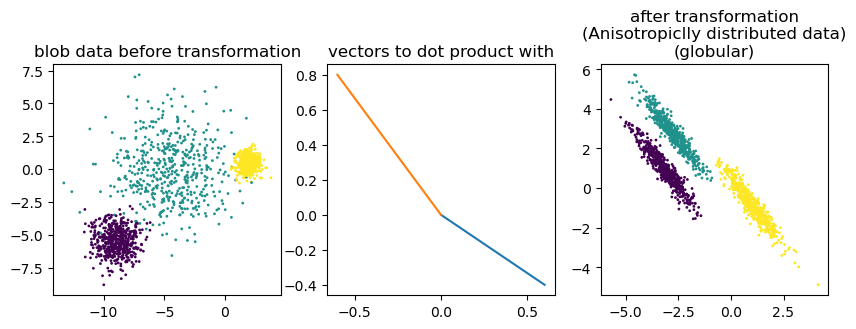

In [32]:
X,Y=datasets.make_blobs(n_samples=n_samples,cluster_std=[1.0,2.5,0.5],random_state=170)
x=[i[0] for i in X]
y=[i[1] for i in X]
fig, axs=plt.subplots(1,3,figsize=[10,3])
axs[0].scatter(x,y,s=1,c=aniso_df['category'])
axs[0].set_title('blob data before transformation')
axs[1].plot([0,0.6],[0,-0.4],'-')
axs[1].plot([0,-0.6],[0,0.8],'-',)
axs[1].set_title('vectors to dot product with')
axs[2].scatter(aniso_df['x'],aniso_df['y'],s=1,c=aniso_df['category'])
axs[2].set_title('after transformation\n(Anisotropiclly distributed data)\n(globular)')
plt.show()

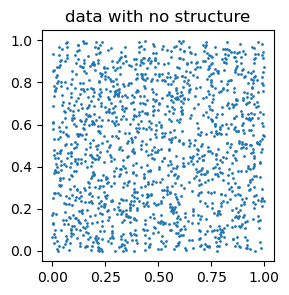

In [13]:
no_structure=rng.rand(n_samples,2)

tempdict={'x':[i[0] for i in no_structure],'y':[i[1] for i in no_structure]}
no_structure_df=pd.DataFrame(tempdict)

plt.figure(figsize=(3,3))
plt.title('data with no structure')
plt.scatter(no_structure_df['x'],no_structure_df['y'],s=1)

In [17]:
data_dict={'Noisy circles Data':[noisy_circles_df,2],
           'Noisy moons Data':[noisy_moons_df,2],
           'Blob Data':[blob_df,3],
           'varied data':[varied_df,3],
           'Anisotropiclly':[aniso_df,3],
           'No structure':[no_structure_df,3]}

In [18]:
all_linkage=['ward','average','single','complete']

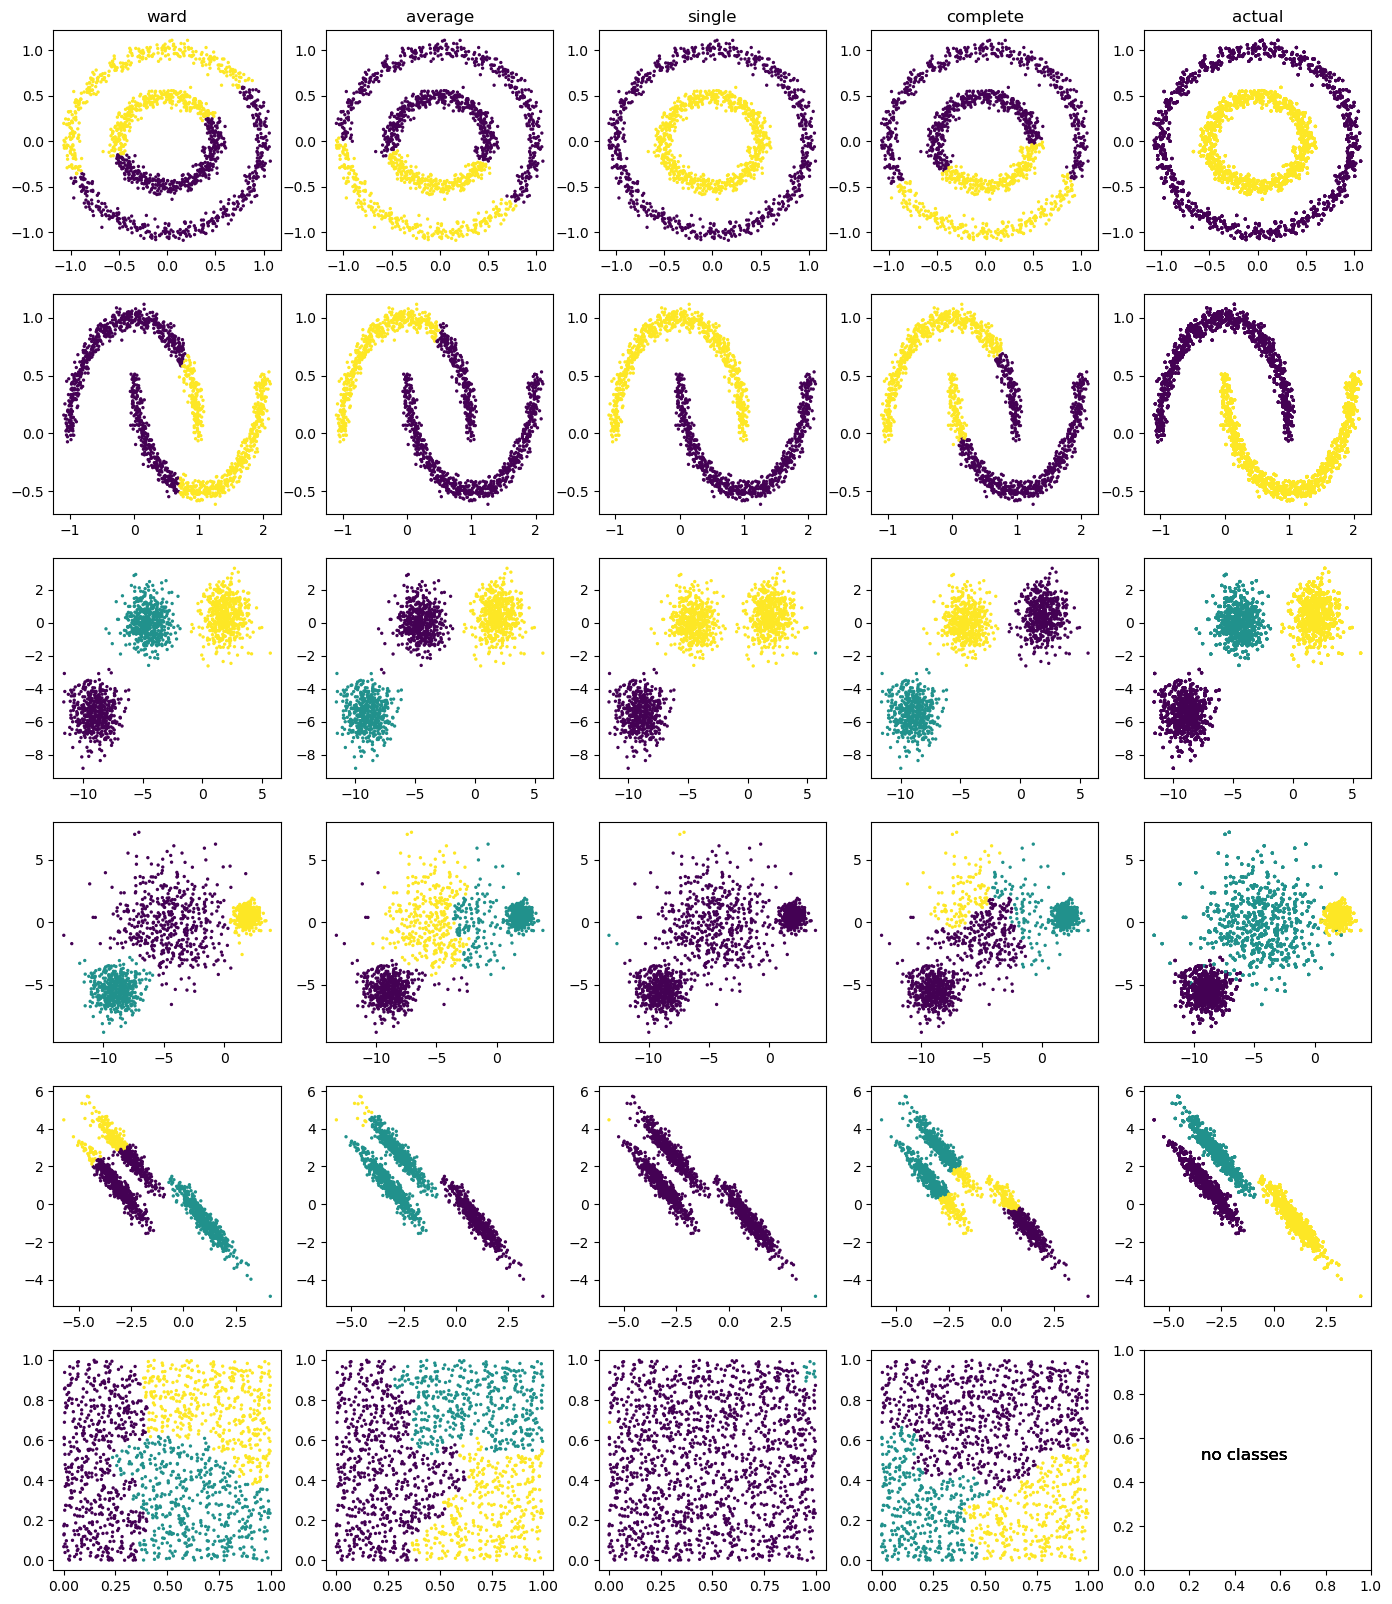

In [19]:

fig, axs=plt.subplots(6,5,figsize=[17,20])

for i,item in enumerate(data_dict.items(),0):
    name=item[0]
    dt=item[1][0]
    param=item[1][1]
    
    for j in range(4):
        labels=ag_cluster(linkage=all_linkage[j],n_clusters=param).fit_predict(dt[['x','y']])
        axs[i][j].scatter(dt['x'],dt['y'],c=labels,s=2)
        if name!='No structure':
            axs[i][4].scatter(dt['x'],dt['y'],c=dt['category'],s=2)
        else: axs[i][4].text(0.25,0.5,'no classes',size='large')

for i in range(5):
    if i!=4:
        axs[0][i].set_title(all_linkage[i])
    else: axs[0][i].set_title('actual')

plt.show()